0.994
0.014577259475218656
22.72946666666667
[5.50962824 1.19415348]
With gravity  5.509628240187419

without gravity  1.1941534832131528


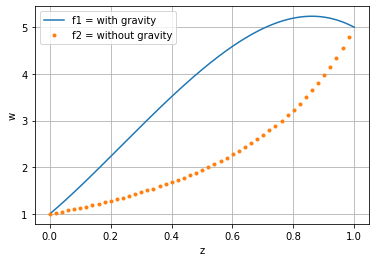

In [11]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
 
w = 1
r = 1420
L = 7
n = 10000
R_e = (r*L*w)/n
print(R_e)

F_r = w**2 / (9.8*L)
print(F_r)

G = R_e/(3*F_r)
print(G)

def f1(w_ini, z):
    w, y = w_ini   
    dwdz = y
    dydz = ((((R_e* w * y )/ 3)) + (y ** 2 / w)) - G
    return dwdz, dydz

def f2(w_ini, z):
    w, y = w_ini   
    dwdz = y
    dydz = ((((R_e* w * y) / 3)) + (y ** 2 / w))
    return dwdz, dydz

z = np.linspace(0,1,500)
y_target = 5.00

def y_shoot(y):
    w_ini_f1 = [w, y[0]]
    w_ini_f2 = [w, y[1]]
    odesolver_f1 = odeint(f1, w_ini_f1, z)
    odesolver_f2 = odeint(f2, w_ini_f2, z)
    return [odesolver_f1[:, 0][-1] - y_target, odesolver_f2[:, 0][-1] - y_target]

y = fsolve(y_shoot, [5.7,1.5])
print(y)

w_ini_f1 = [w, y[0]]
w_ini_f2 = [w, y[1]]

odesolver_f1 = odeint(f1, w_ini_f1, z) ## outpu : array[w,y]
odesolver_f2 = odeint(f2, w_ini_f2, z)
print("With gravity ",y[0])
print("\nwithout gravity ",y[1])
plt.plot(z, odesolver_f1[:, 0], '-', markevery=10, label='f1 = with gravity')
plt.plot(z, odesolver_f2[:, 0], '.', markevery=10, label='f2 = without gravity')
plt.legend()
plt.grid()
plt.xlabel('z')
plt.ylabel('w')

plt.show()
